# Tourism Case Study - Problem Statement

Tourism is now recognized as a directly measurable activity, enabling more accurate analysis and more effective policies can be made for tourism. Whereas previously the sector relied mostly on approximations from related areas of measurement (e.g. Balance of Payments statistics), tourism nowadays is a productive activity which can be analyzed using  factors like economic indicators, social indicators, environmental & infrastructure indicators, etc. As a Data Scientist in a leading tours and travels company, you have been assigned the task of analyzing several of these factors and group countries based on them to help understand the key locations where the company can invest in tourism services.

# Objective

To explore the data and identify different groups of countries based on important factors to find key locations where investments can be made to promote tourism services.

# Key steps/ questions

- Data Cleaning and Data Preparation
- EDA
- Which variables will you use for clustering? Provide reasoning for the same.
- How many different groups (clusters/segments) of countries can be found from the data?
- Do cluster profiling.
- How to use PCA on the chosen variables and retain the components which explain 90% variance?
- How to perform clustering using the components obtained from PCA?
- Do cluster profiling of new clusters.
- Provide business recommendations.

### About the Dataset

This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructure indicators. 
 
### Data Dictionary
- 'country',
- 'Region', 
- 'Surface area' in  (km2) 
- Population in thousands (2017) 
- Population density (per km2, 2017)  
- Sex ratio (m per 100 f, 2017) : number of male per 100 female
- 'GDP: Gross domestic product (million current US dollar)'
- 'Economy: Agriculture (% of GVA -Gross Value Added)'
- "Economy: Industry (% of GVA)"
- "Economy: Services and other activity (% of GVA-Gross Value Added)"
- International trade: Exports (million US dollar) 
- International trade: Imports (million US dollar) 
- International trade: Balance (million US dollar)
- Fertility rate, total (live births per woman)
- 'Infant mortality rate (per 1000 live births)'
- 'Health: Total expenditure (% of GDP)'
- 'Education: Government expenditure (% of GDP)'
- 'Mobile-cellular subscriptions (per 100 inhabitants)' 
- 'Individuals using the Internet (per 100 inhabitants)' 
- 'Threatened species (number)' 
- 'CO2 emission estimates (million tons/tons per capita)',
- 'Energy production, primary (Petajoules)'


**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

**Read the dataset**

In [2]:
path = 'F:/GL Office/case study/Unsupervised Learning/mentor week 2/mls week2 for Aug/'
df = pd.read_csv(path+'country_stats.csv')

In [3]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Health: Total expenditure (% of GDP),Education: Government expenditure (% of GDP),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),Threatened species (number),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)"
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,23.3,23.3,53.3,1458,3568,-2110,5.3,68.6,8.2,3.3,61.6,42,2.1,63,5
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,22.4,26.0,51.7,1962,4669,-2707,1.7,14.6,5.9,3.5,106.4,130,28.2,84,36
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,12.2,37.3,50.5,29992,47091,-17099,3,27.7,7.2,...,113,135,0.8,5900,55
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99.0,-99,-99,-99,2.6,9.6,-99.0,-99,...,92,87.9,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.5,10.8,88.6,100,1355,-1255,1.2,-99,8.1,3.3,88.1,13,34,1,119


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 22 columns):
country                                                  229 non-null object
Region                                                   229 non-null object
Surface area (km2)                                       229 non-null object
Population in thousands (2017)                           229 non-null int64
Population density (per km2, 2017)                       229 non-null float64
Sex ratio (m per 100 f, 2017)                            229 non-null float64
GDP: Gross domestic product (million current US$)        229 non-null int64
Economy: Agriculture (% of GVA)                          229 non-null object
Economy: Industry (% of GVA)                             229 non-null float64
Economy: Services and other activity (% of GVA)          229 non-null float64
International trade: Exports (million US$)               229 non-null object
International trade: Imports (million US$)    

**Observation**
- The columns 'Surface area','Economy: Agriculture','International trade: Exports', 'International trade: Imports', 'Fertility rate, total','Infant mortality rate', 'Education: Government expenditure','Mobile-cellular subscriptions','Threatened species' are of type object, but should actually are numeric in nature.

In [5]:
# Lets us look at the data summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,229,229,Slovenia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,229,22,Caribbean,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surface area (km2),229,225,-99,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population in thousands (2017),229,NaN,NaN,NaN,32756.8,133275,1,431,5448,19193,1.40952e+06
"Population density (per km2, 2017)",229,NaN,NaN,NaN,462.825,2305.38,0.1,35.9,88.1,222.8,25969.8
"Sex ratio (m per 100 f, 2017)",229,NaN,NaN,NaN,100.202,28.3278,-99,96.4,99,101.7,301.2
GDP: Gross domestic product (million current US$),229,NaN,NaN,NaN,321434,1.47869e+06,-99,2078,16251,117955,1.80366e+07
Economy: Agriculture (% of GVA),229,139,-99,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Economy: Industry (% of GVA),229,NaN,NaN,NaN,15.959,38.6846,-99,15.4,25.5,32.8,79.9
Economy: Services and other activity (% of GVA),229,NaN,NaN,NaN,46.4087,48.6037,-99,47.3,59.5,70.7,94


**Observations**
- There are 229 rows indicating countries
- There are several variables which indicates economic condition of a country

In [6]:
# Let us clean columns names
cols_init = df.columns.tolist()
cols_new = [item.split('(')[0].rstrip() for item in cols_init]
cols_units = ['(' + item.split('(')[-1] if '(' in item else None for item in cols_init]
print('New column names:\n',cols_new)
print('\nDescription/Units:\n',cols_units)

New column names:
 ['country', 'Region', 'Surface area', 'Population in thousands', 'Population density', 'Sex ratio', 'GDP: Gross domestic product', 'Economy: Agriculture', 'Economy: Industry', 'Economy: Services and other activity', 'International trade: Exports', 'International trade: Imports', 'International trade: Balance', 'Fertility rate, total', 'Infant mortality rate', 'Health: Total expenditure', 'Education: Government expenditure', 'Mobile-cellular subscriptions', 'Individuals using the Internet', 'Threatened species', 'CO2 emission estimates', 'Energy production, primary']

Description/Units:
 [None, None, '(km2)', '(2017)', '(per km2, 2017)', '(m per 100 f, 2017)', '(million current US$)', '(% of GVA)', '(% of GVA)', '(% of GVA)', '(million US$)', '(million US$)', '(million US$)', '(live births per woman)', '(per 1000 live births)', '(% of GDP)', '(% of GDP)', '(per 100 inhabitants)', '(per 100 inhabitants)', '(number)', '(million tons/tons per capita)', '(Petajoules)']


In [7]:
df.columns = cols_new
df.head()

,country,Region,Surface area,Population in thousands,Population density,Sex ratio,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,"Fertility rate, total",Infant mortality rate,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,Threatened species,CO2 emission estimates,"Energy production, primary"
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,23.3,23.3,53.3,1458,3568,-2110,5.3,68.6,8.2,3.3,61.6,42,2.1,63,5
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,22.4,26.0,51.7,1962,4669,-2707,1.7,14.6,5.9,3.5,106.4,130,28.2,84,36
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,12.2,37.3,50.5,29992,47091,-17099,3,27.7,7.2,...,113,135,0.8,5900,55
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99.0,-99,-99,-99,2.6,9.6,-99.0,-99,...,92,87.9,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.5,10.8,88.6,100,1355,-1255,1.2,-99,8.1,3.3,88.1,13,34,1,119


In [8]:
# Lets see unique values 
colmns = df.columns
for col in colmns:
    print('Unique Values of {} are \n'.format(col),df[col].unique())
    print('*'*90)

Unique Values of country are 
 ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Falkland Islan

In [9]:
for item in colmns:
    df[item] = df[item].apply(lambda x: np.nan if x in [-99,'-99'] else x)
    df[item] = df[item].apply(lambda x: np.nan if x == '...' else x)
    df[item] = df[item].apply(lambda x: 0.00001 if x == '~0' else x)
    df[item] = df[item].apply(lambda x: 0.00001 if x == '~0.0'else x)

In [10]:
df.head(15)

,country,Region,Surface area,Population in thousands,Population density,Sex ratio,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,"Fertility rate, total",Infant mortality rate,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,Threatened species,CO2 emission estimates,"Energy production, primary"
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,23.3,23.3,53.3,1458,3568,-2110,5.3,68.6,8.2,3.3,61.6,42.0,2.1,63.0,5.0
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,22.4,26.0,51.7,1962,4669,-2707,1.7,14.6,5.9,3.5,106.4,130.0,28.2,84.0,36.0
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,12.2,37.3,50.5,29992,47091,-17099,3,27.7,7.2,NaN,113,135.0,0.8,5900.0,55.0
3,American Samoa,Polynesia,199,56,278.2,103.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,9.6,NaN,NaN,NaN,92.0,87.9,NaN,NaN
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.5,10.8,88.6,100,1355,-1255,1.2,NaN,8.1,3.3,88.1,13.0,34,1.0,119.0
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955.0,6.8,51.2,42.0,21011,8790,12221,6,65.4,3.3,NaN,60.8,146.0,46.5,3902.0,25.0
6,Anguilla,Caribbean,91,15,165.7,97.6,320.0,2.3,15.7,82.0,2,154,-153,NaN,NaN,NaN,NaN,177.9,52.0,61.1,0.0,136.0
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356.0,1.9,18.3,79.8,61,491,-429,2.1,9.1,5.5,NaN,137.2,55.0,22.3,NaN,84.0
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343.0,6,27.8,66.2,57733,55610,2124,2.3,13.7,4.8,5.3,143.9,256.0,10,3167.0,85.0
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529.0,19,28.3,52.8,1776,3230,-1455,1.6,13.2,4.5,2.8,115.2,114.0,11.7,48.0,46.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 22 columns):
country                                 229 non-null object
Region                                  229 non-null object
Surface area                            226 non-null object
Population in thousands                 229 non-null int64
Population density                      229 non-null float64
Sex ratio                               227 non-null float64
GDP: Gross domestic product             208 non-null float64
Economy: Agriculture                    206 non-null object
Economy: Industry                       208 non-null float64
Economy: Services and other activity    208 non-null float64
International trade: Exports            210 non-null object
International trade: Imports            210 non-null object
International trade: Balance            210 non-null object
Fertility rate, total                   212 non-null object
Infant mortality rate                   204 non-nul

**Reason for choosing variables for clustering**

- 'Surface area' : A country with large surface area will have different kind of land scape ,flora and fona which will of interest to tourist
-  GDP : citizen of highly developed countries can afford tourism
- Economy: A country with good economic condition can support tourism industry
- Heath: A country where expenditure on high , will have citizen of high life span so they can have plenty of time in thier life may be in old age for tourism
- A country where internet and mobile usage is high can help tourist when traveling for fun , adventure etc which is part of tourism activity.


In [12]:
# We will use only a subset of all columns to do the clustering
"""
The population and economic factors will help determine the financial and living conditions of the country,
while the other factors like CO2 emissions and mobile/internet facilities will give information about connectivity.
"""


cluster_cols = [ 'Region','Surface area', 'Population in thousands', 'Population density', \
                'GDP: Gross domestic product', 'Economy: Agriculture', 'Economy: Industry', \
                'Economy: Services and other activity', 'International trade: Exports', 'International trade: Imports', \
                'International trade: Balance', 'Health: Total expenditure', 'Education: Government expenditure', \
                'Mobile-cellular subscriptions', 'Individuals using the Internet', 'CO2 emission estimates']
                

In [13]:
df1 = df[cluster_cols].copy()
df1.head()

,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates
0,SouthernAsia,652864,35530,54.4,20270.0,23.3,23.3,53.3,1458,3568,-2110,8.2,3.3,61.6,42.0,63.0
1,SouthernEurope,28748,2930,106.9,11541.0,22.4,26.0,51.7,1962,4669,-2707,5.9,3.5,106.4,130.0,84.0
2,NorthernAfrica,2381741,41318,17.3,164779.0,12.2,37.3,50.5,29992,47091,-17099,7.2,NaN,113,135.0,5900.0
3,Polynesia,199,56,278.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN
4,SouthernEurope,468,77,163.8,2812.0,0.5,10.8,88.6,100,1355,-1255,8.1,3.3,88.1,13.0,1.0


### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [14]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df1['Region'])

Caribbean            25
EasternAfrica        19
WesternAsia          18
SouthernEurope       16
WesternAfrica        16
SouthAmerica         14
NorthernEurope       13
South-easternAsia    11
EasternEurope        10
SouthernAsia          9
WesternEurope         9
MiddleAfrica          9
Polynesia             9
CentralAmerica        8
EasternAsia           7
Micronesia            7
NorthernAfrica        7
Melanesia             5
CentralAsia           5
NorthernAmerica       5
SouthernAfrica        5
Oceania               2
Name: Region, dtype: int64

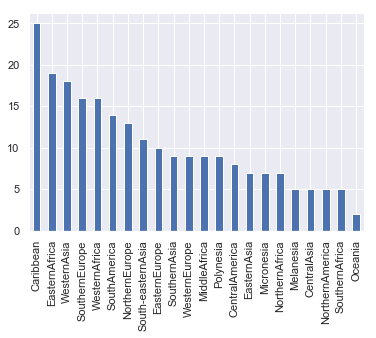

In [15]:
pd.value_counts(df1["Region"]).plot(kind="bar")

In [16]:
#checking for missing values

df1.isna().sum()

Region                                   0
Surface area                             3
Population in thousands                  0
Population density                       0
GDP: Gross domestic product             21
Economy: Agriculture                    23
Economy: Industry                       21
Economy: Services and other activity    21
International trade: Exports            19
International trade: Imports            19
International trade: Balance            19
Health: Total expenditure               39
Education: Government expenditure       81
Mobile-cellular subscriptions           20
Individuals using the Internet           1
CO2 emission estimates                  20
dtype: int64

In [17]:
# checking median of attributes grouped by region
df1.groupby('Region').median()

,Population in thousands,Population density,GDP: Gross domestic product,Economy: Industry,Economy: Services and other activity,Health: Total expenditure,Individuals using the Internet,CO2 emission estimates
Region,,,,,,,,
Caribbean,108.0,266.00,1450.0,15.40,79.80,6.10,60.0,0.5
CentralAmerica,6298.0,74.60,38991.0,26.30,62.65,7.40,295.5,98.0
CentralAsia,8921.0,31.50,37597.0,32.50,47.90,5.80,54.0,2339.0
EasternAfrica,14742.0,87.30,10625.0,20.00,55.45,5.70,148.0,129.0
EasternAsia,25491.0,349.70,309236.0,34.10,59.70,6.45,78.0,992.5
EasternEurope,10170.0,96.45,106165.0,33.00,62.40,7.25,62.0,791.5
Melanesia,611.0,21.80,4391.0,18.10,64.90,4.75,291.0,3.0
Micronesia,55.0,150.80,189.0,10.20,65.80,10.20,102.0,0.0
MiddleAfrica,5261.0,23.90,13735.0,44.20,40.40,4.10,146.0,559.0


In [18]:
# replacing missing values by median of the attributes grouped by region

for col in df1.iloc[:,1:].columns.tolist():
    df1[col] = df1.groupby(["Region"])[col].transform(lambda x: x.fillna(x.median()))

df1.isna().sum()

Region                                  0
Surface area                            0
Population in thousands                 0
Population density                      0
GDP: Gross domestic product             0
Economy: Agriculture                    0
Economy: Industry                       0
Economy: Services and other activity    0
International trade: Exports            0
International trade: Imports            0
International trade: Balance            0
Health: Total expenditure               0
Education: Government expenditure       0
Mobile-cellular subscriptions           0
Individuals using the Internet          0
CO2 emission estimates                  0
dtype: int64

All missing values have been imputed.

### KDE plot for all the features to see how many of it can show separate clusters.

In [19]:
data = df1.copy()

In [20]:
data.head()

,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates
0,SouthernAsia,652864,35530,54.4,20270.0,23.3,23.3,53.3,1458,3568,-2110,8.2,3.3,61.6,42.0,63.0
1,SouthernEurope,28748,2930,106.9,11541.0,22.4,26.0,51.7,1962,4669,-2707,5.9,3.5,106.4,130.0,84.0
2,NorthernAfrica,2381741,41318,17.3,164779.0,12.2,37.3,50.5,29992,47091,-17099,7.2,6.3,113,135.0,5900.0
3,Polynesia,199,56,278.2,402.0,9.3,11.9,66.6,14,98,-84,7.2,3.9,62.05,92.0,0.5
4,SouthernEurope,468,77,163.8,2812.0,0.5,10.8,88.6,100,1355,-1255,8.1,3.3,88.1,13.0,1.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
Region                                  229 non-null object
Surface area                            229 non-null object
Population in thousands                 229 non-null int64
Population density                      229 non-null float64
GDP: Gross domestic product             229 non-null float64
Economy: Agriculture                    229 non-null object
Economy: Industry                       229 non-null float64
Economy: Services and other activity    229 non-null float64
International trade: Exports            229 non-null object
International trade: Imports            229 non-null object
International trade: Balance            229 non-null object
Health: Total expenditure               229 non-null float64
Education: Government expenditure       229 non-null object
Mobile-cellular subscriptions           229 non-null object
Individuals using the Internet          229 non-nul

 Surface area , Economy: Agriculture , International trade: Exports , International trade: Imports, International trade: Balance , Education: Government expenditure, Mobile-cellular subscriptions should be numerical columns instead of object type

In [22]:
to_be_num = ['Surface area' , 'Economy: Agriculture' , 'International trade: Exports' , 'International trade: Imports', 'International trade: Balance' , 'Education: Government expenditure','Mobile-cellular subscriptions']
for col in to_be_num:
    data[col] = data[col].astype('float')
    

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
Region                                  229 non-null object
Surface area                            229 non-null float64
Population in thousands                 229 non-null int64
Population density                      229 non-null float64
GDP: Gross domestic product             229 non-null float64
Economy: Agriculture                    229 non-null float64
Economy: Industry                       229 non-null float64
Economy: Services and other activity    229 non-null float64
International trade: Exports            229 non-null float64
International trade: Imports            229 non-null float64
International trade: Balance            229 non-null float64
Health: Total expenditure               229 non-null float64
Education: Government expenditure       229 non-null float64
Mobile-cellular subscriptions           229 non-null float64
Individuals using the Internet          229 

- data type of numerical columns are fixed

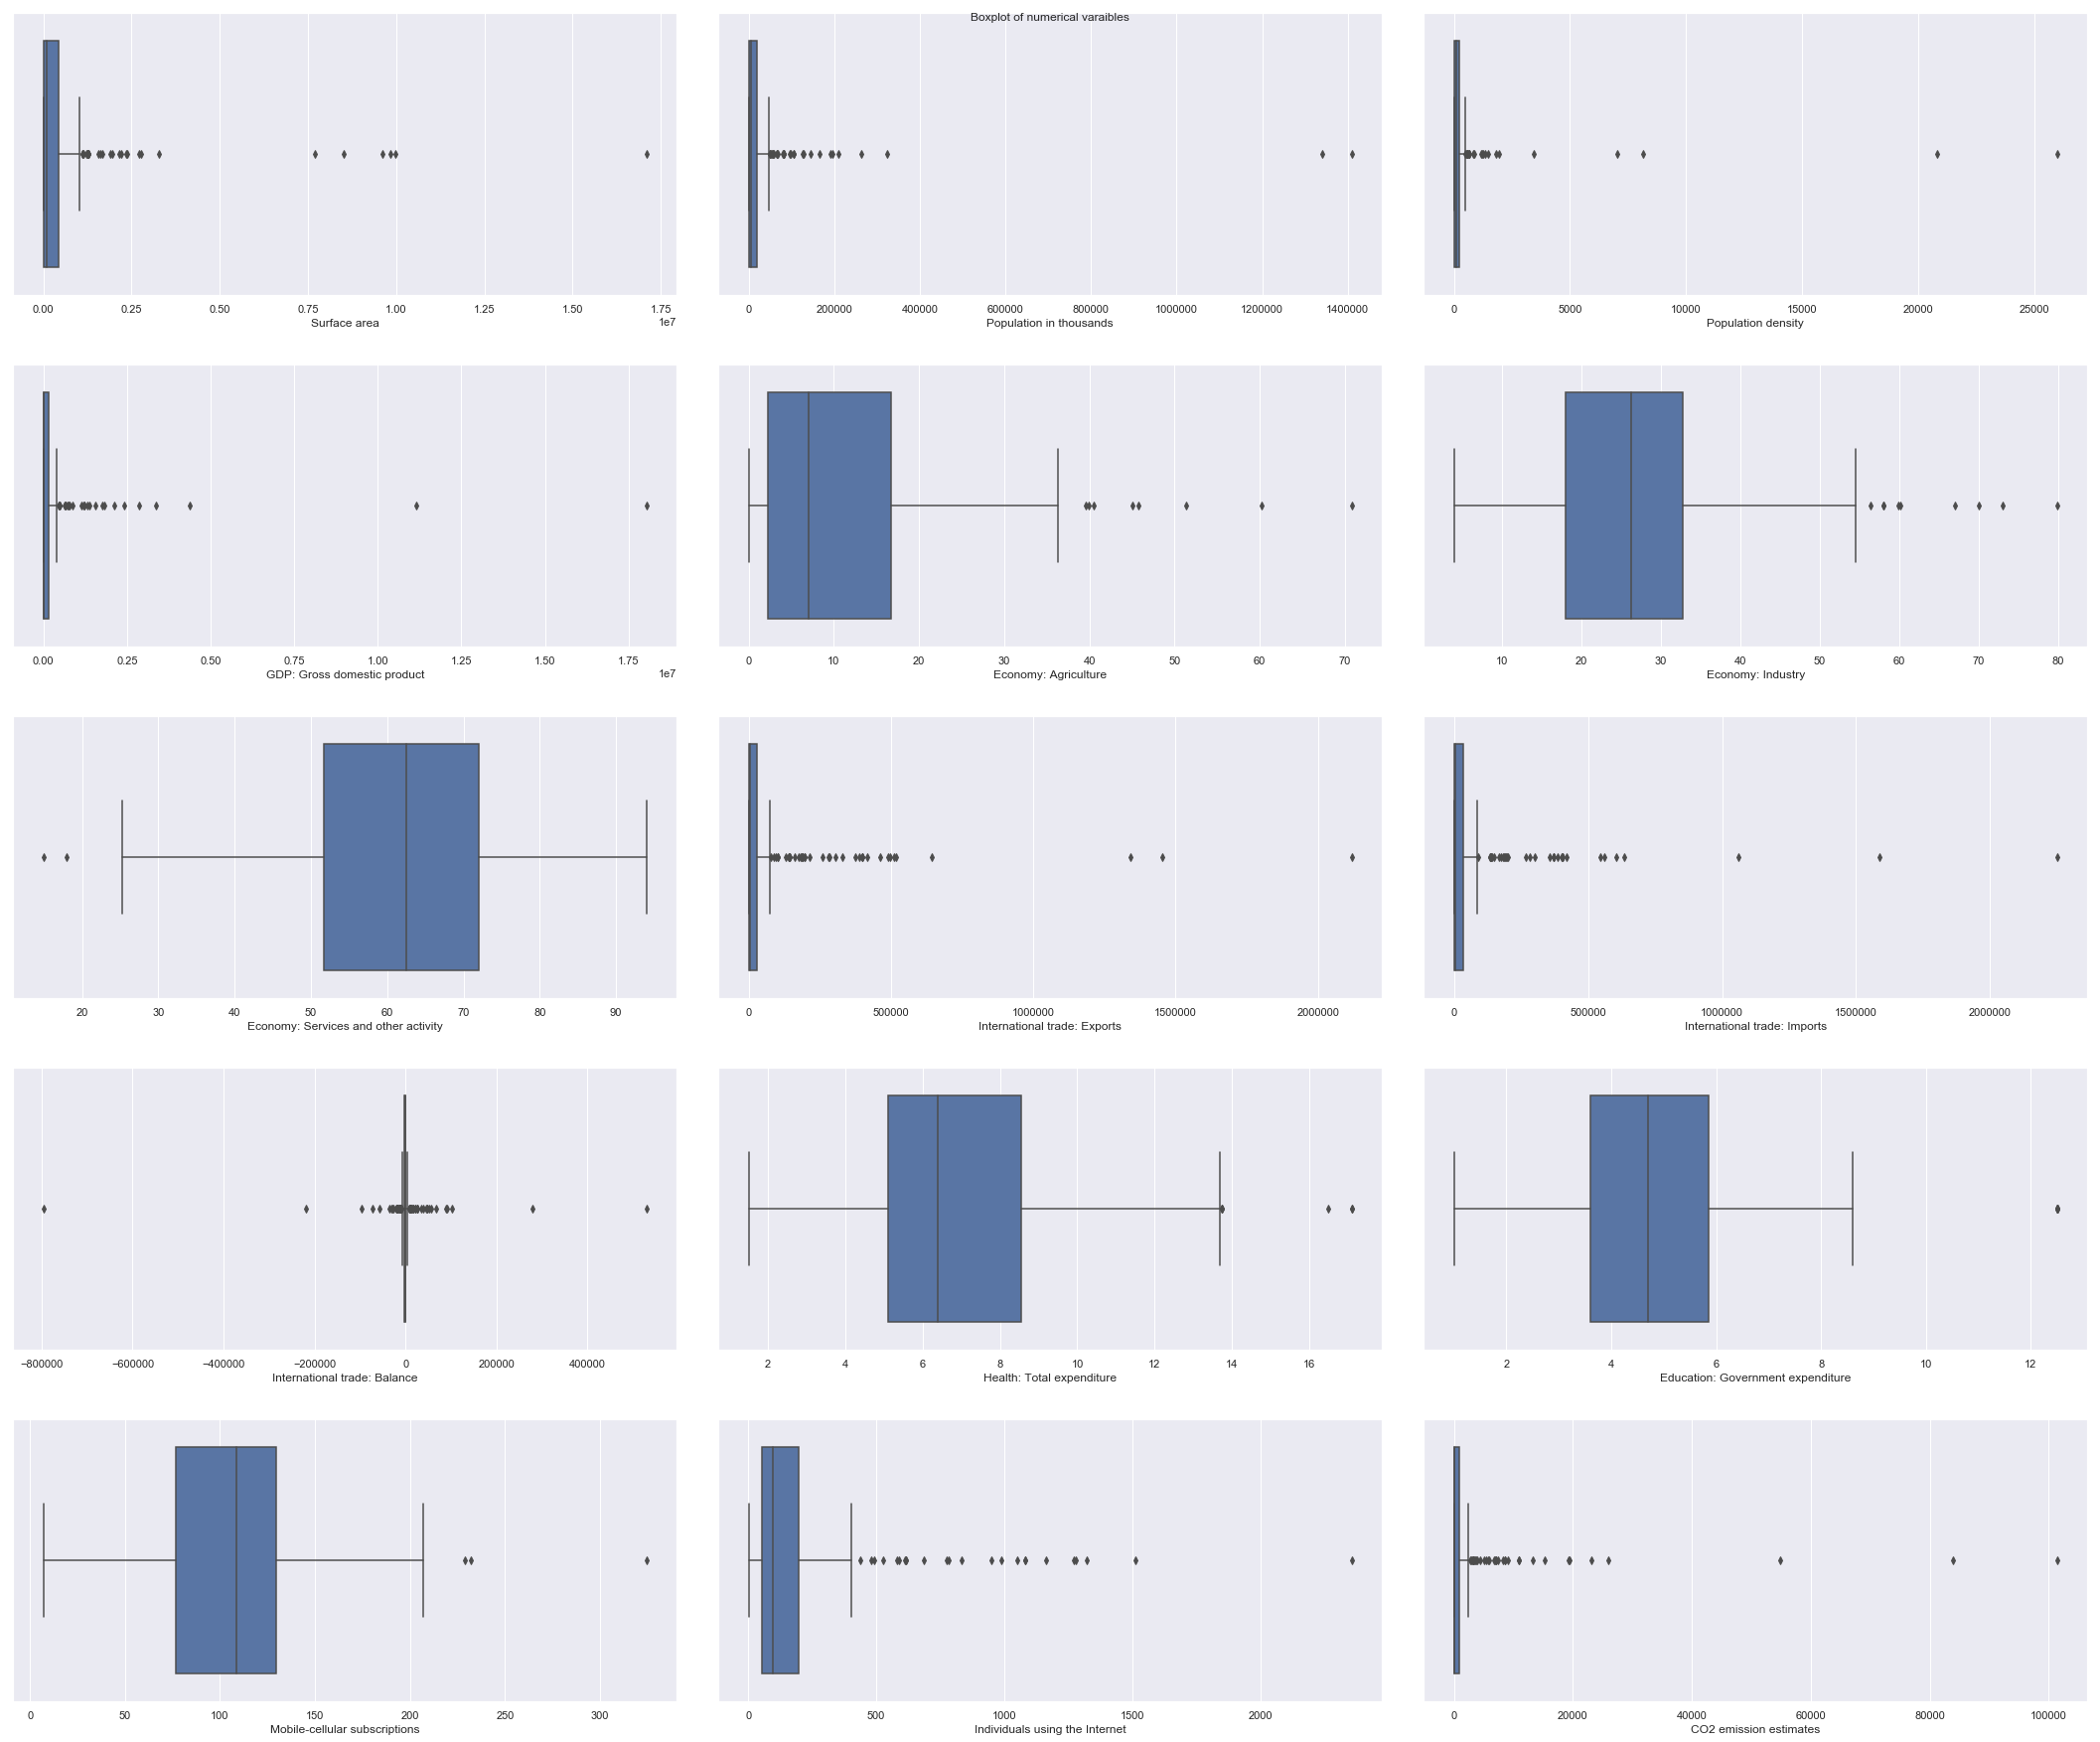

In [24]:
# rounding float value
data = data.round(4)#.round(5)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

all_col = data.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(5, 3,  figsize=(30, 25))
fig.suptitle('Boxplot of numerical varaibles')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0],x=data[all_col[counter]])
    #axes[ii][0].set_title(all_col[counter])
    counter = counter+1
    sns.boxplot(ax=axes[ii][1],x=data[all_col[counter]])
    #axes[ii][1].set_title(all_col[counter])
    counter = counter+1
    sns.boxplot(ax=axes[ii][2],x=data[all_col[counter]])
    #axes[ii][0].set_title(all_col[counter])
    counter = counter+1


fig.tight_layout(pad=3.0)

**Observations**
- There are extreme upper outliers in variables like Surface area, Population and population density, international export and import


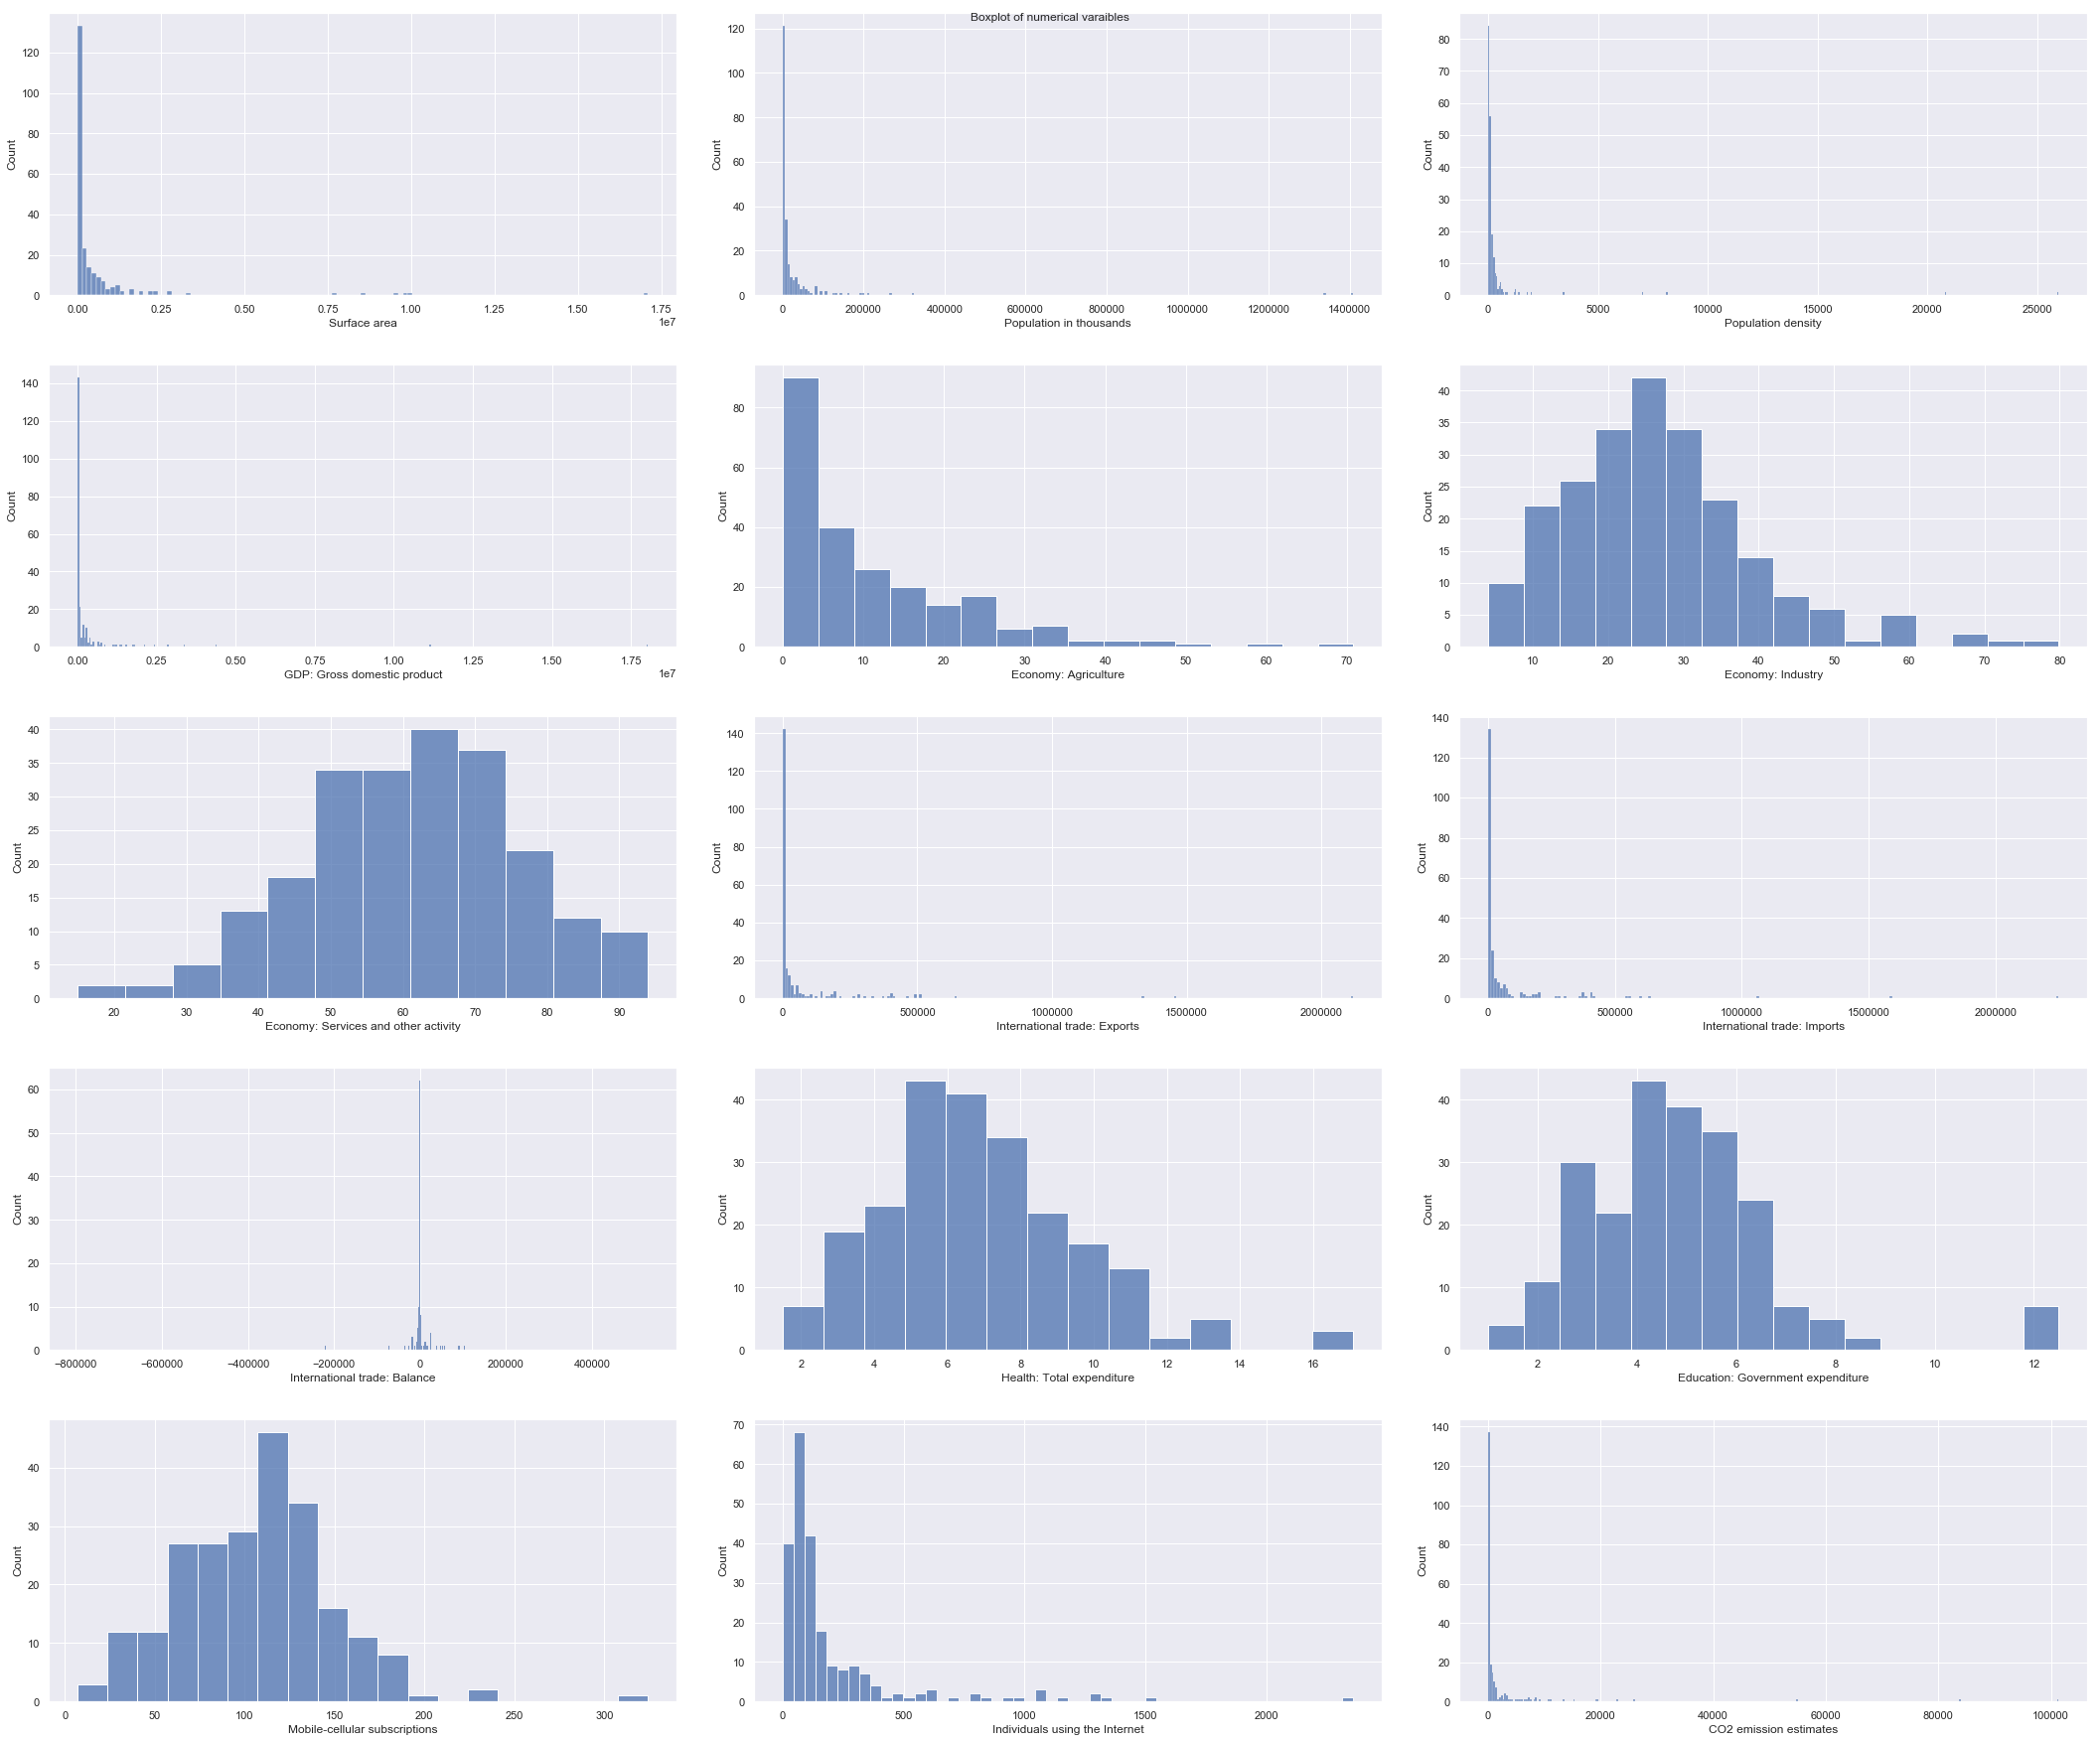

In [25]:
fig, axes = plt.subplots(5, 3,  figsize=(30, 25))
fig.suptitle('Boxplot of numerical varaibles')
counter = 0
for ii in range(5):
    sns.histplot(ax=axes[ii][0],x=data[all_col[counter]])
    #axes[ii][0].set_title(all_col[counter])
    counter = counter+1
    sns.histplot(ax=axes[ii][1],x=data[all_col[counter]])
    #axes[ii][1].set_title(all_col[counter])
    counter = counter+1
    sns.histplot(ax=axes[ii][2],x=data[all_col[counter]])
    #axes[ii][0].set_title(all_col[counter])
    counter = counter+1


fig.tight_layout(pad=3.0)

**Observations**
- Variables like surface area, population, internet usage are right skewed


# Bivariate Analysis

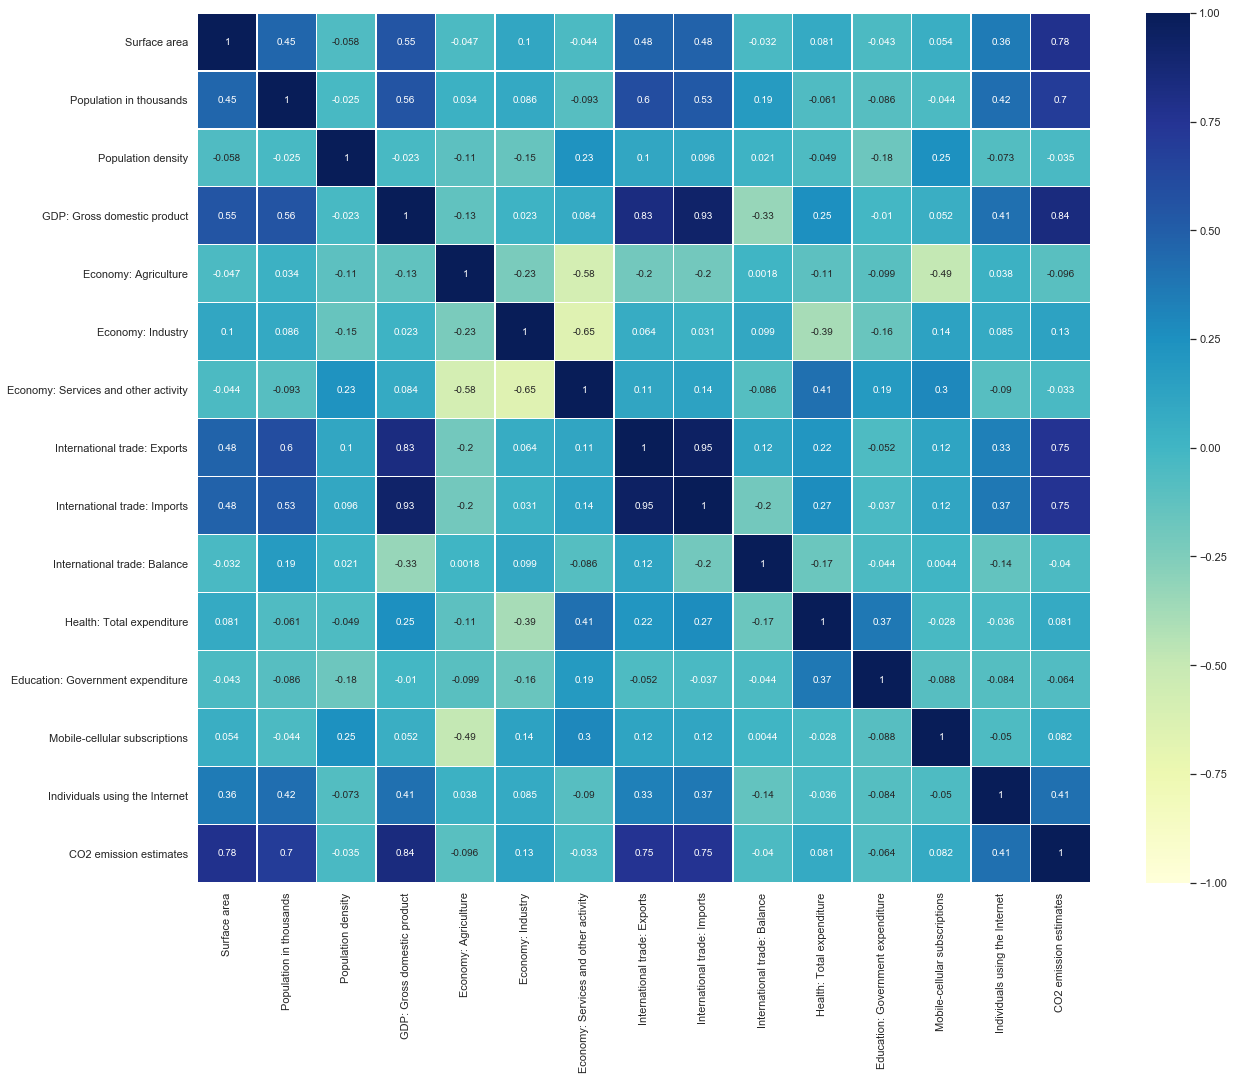

In [26]:
plt.figure(figsize=(20,16))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            cmap="YlGnBu")

plt.show()

**Observations**
- International trade import is highly correlated with GDP of a the country and International trade export which is obvious as country with highly GDP tend to do high trade
- CO2 is highly correlated with GDP indicating that developed countries tend to emit more CO2 than less developed countries with low GDP

**Standardize the data**

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
subset_scaled_df = pd.DataFrame(sc.fit_transform(data.drop('Region',axis=1)),columns=data.drop('Region',axis=1).columns)
subset_scaled_df.head()

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates
0,0.035310,0.020854,-0.177549,-0.210173,1.042856,-0.274480,-0.553324,-0.326201,-0.315127,-0.022866,0.477955,-0.768586,-1.047607,-0.532544,-0.245291
1,-0.315158,-0.224289,-0.154727,-0.216092,0.966043,-0.064870,-0.659127,-0.323875,-0.310106,-0.031399,-0.364263,-0.669595,0.012310,-0.234595,-0.243167
2,1.006147,0.064378,-0.193677,-0.112187,0.095503,0.812389,-0.738478,-0.194482,-0.116652,-0.237101,0.111773,0.716281,0.168458,-0.217666,0.345149
3,-0.331189,-0.245901,-0.080260,-0.223645,-0.152004,-1.159503,0.326156,-0.332867,-0.330951,0.006091,0.111773,-0.471613,-1.036960,-0.363255,-0.251614
4,-0.331038,-0.245743,-0.129991,-0.222011,-0.903058,-1.244900,1.780935,-0.332470,-0.325219,-0.010646,0.441337,-0.768586,-0.420647,-0.630731,-0.251563


### Hierarchical Clustering

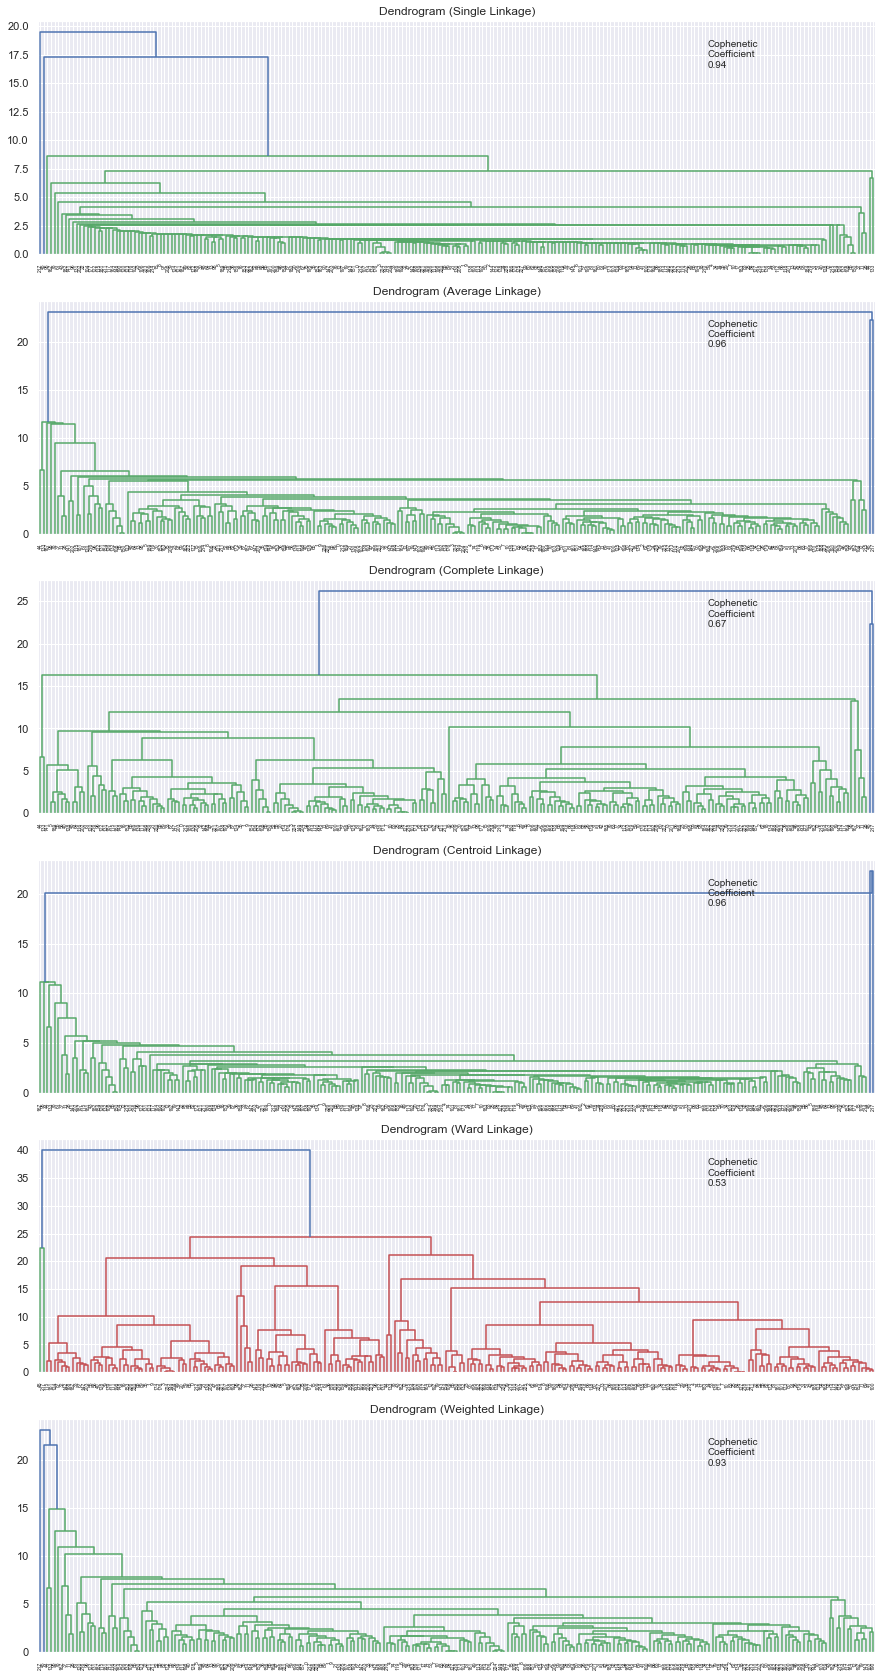

In [28]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

**Observations**
- Out of all the dendrogram we see, it is clear that dendrogram with ward linkage method gave us separate and distinct clusters
- 6 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

## Let us create 6 clusters

In [29]:
#Trying with K value as 6
HCmodel = AgglomerativeClustering(n_clusters=6,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [30]:
data['HC_Clusters'] = HCmodel.labels_

In [31]:
cluster_profile = data.groupby('HC_Clusters').mean()

In [32]:
cluster_profile['count_in_each_segments'] = data.groupby('HC_Clusters')['Surface area'].count().values

In [33]:
# lets see names of countries in each cluster
for cl in data['HC_Clusters'].unique():
    print('In cluster ', cl ,' clutries are: ')
    print(df[data['HC_Clusters']==cl]['country'].unique())

In cluster  5  clutries are: 
['Afghanistan' 'Albania' 'American Samoa' 'Armenia' 'Bangladesh' 'Belize'
 'Benin' 'Burkina Faso' 'Burundi' 'Cambodia' 'Central African Republic'
 'Chad' 'Comoros' 'Cook Islands' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Dominica' 'Eritrea' 'Ethiopia'
 'Guinea-Bissau' 'Guinea' 'Guyana' 'Kenya'
 "Lao People's Democratic Republic" 'Liberia' 'Mali' 'Mauritania'
 'Mayotte' 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Niue'
 'Pakistan' 'Rwanda' 'Saint Helena' 'Samoa' 'Sao Tome and Principe'
 'Sierra Leone' 'Solomon Islands' 'Somalia' 'Sudan' 'Syrian Arab Republic'
 'Togo' 'Tokelau' 'Tonga' 'Uganda' 'Uzbekistan' 'Vanuatu'
 'Wallis and Futuna Islands' 'Yemen']
In cluster  2  clutries are: 
['Algeria' 'Andorra' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Aruba'
 'Austria' 'Bahamas' 'Barbados' 'Belarus' 'Belgium' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovi

In [34]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,,,,
0,1.67518e+06,74847.7,148.702,372293,7.57317,42.3,50.1366,84026.6,83019.3,1007.15,4.98659,4.17927,115.717,502.707,6570.44,41
1,16,331,23395.7,26218,3.225,10,90,199645,190818,8826.5,5.375,1.5,206.6,16,269,2
2,214490,10376.7,345.817,223121,6.45417,24.1723,69.061,66924.2,65921.3,1069.48,7.92614,5.51174,116.244,116.008,662.318,132
3,9.6e+06,1.40952e+06,150.1,1.11585e+07,9.2,41.1,49.7,2.11898e+06,1.5887e+06,530285,5.5,3.6,93.2,1080,101394,1
4,9.83352e+06,324460,35.5,1.80366e+07,1,19.7,79.3,1.45317e+06,2.24966e+06,-796494,17.1,5.4,117.6,1513,83887,1
5,359186,25541.9,139.715,31909.8,26.124,21.9135,50.7933,5103.29,6083.13,-975.721,5.67019,3.85385,67.9596,136.308,521.135,52


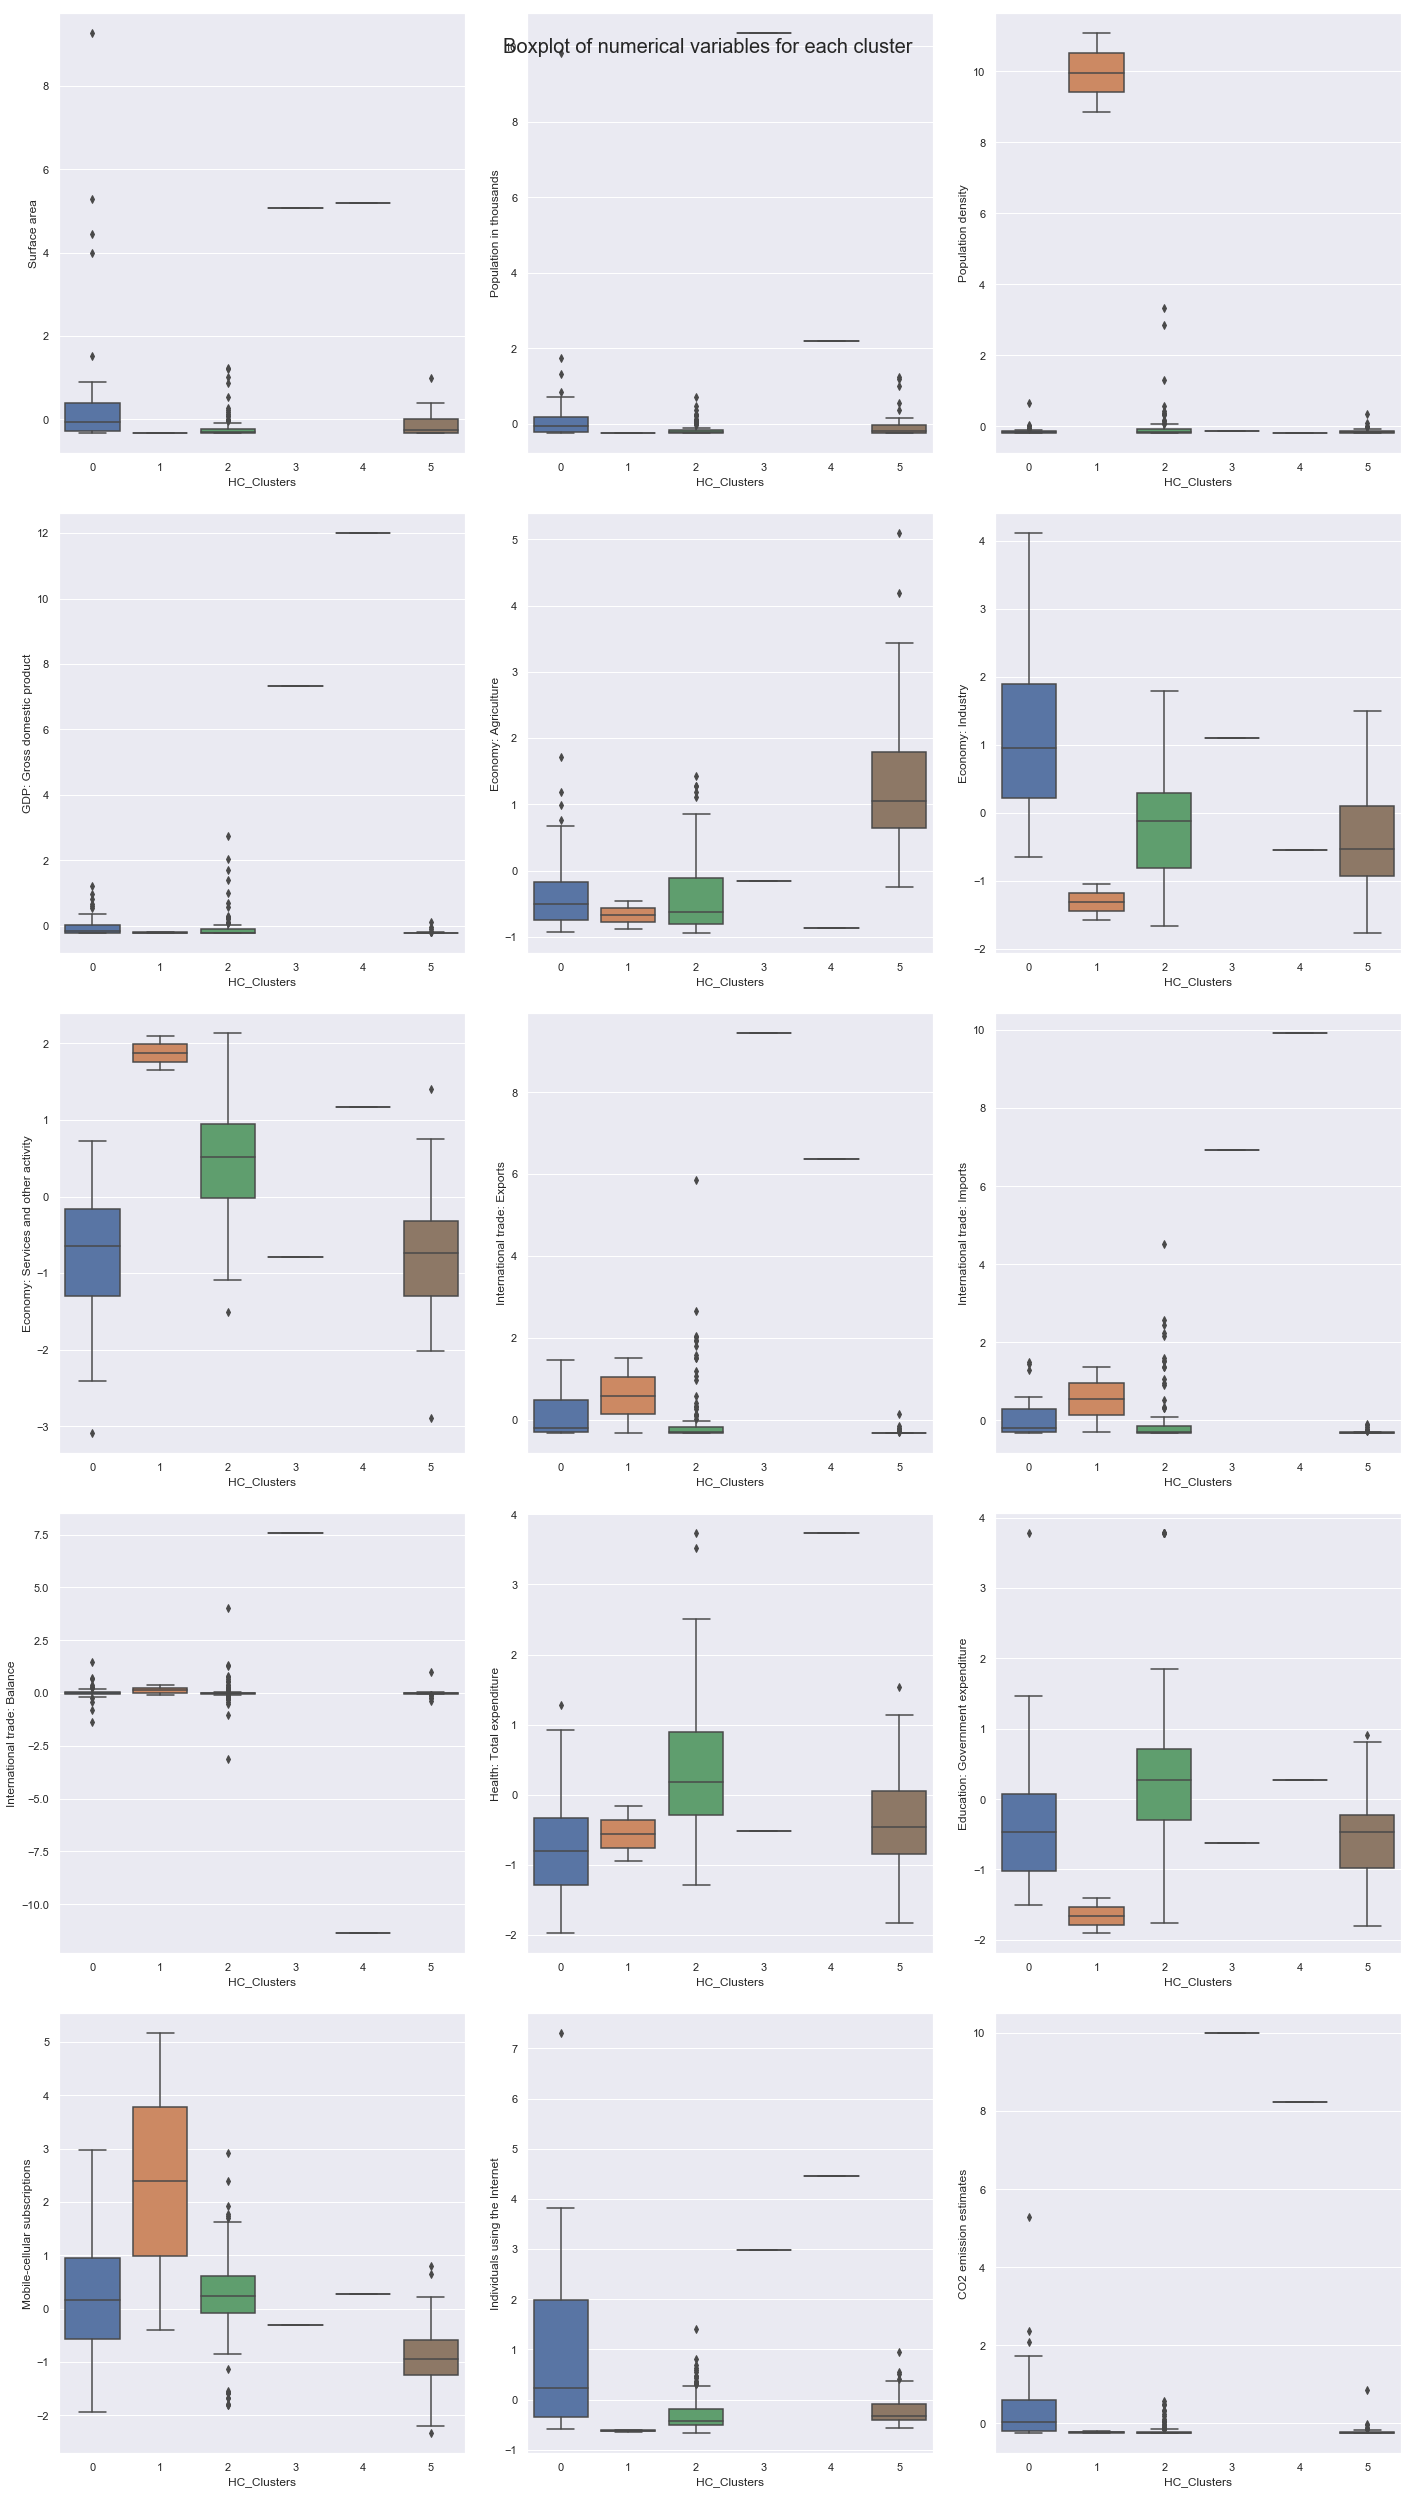

In [35]:
fig, axes = plt.subplots(5, 3,  figsize=(20, 35))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1
    sns.boxplot(ax=axes[ii][1],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1
    sns.boxplot(ax=axes[ii][2],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1
    

fig.tight_layout(pad=2.0)

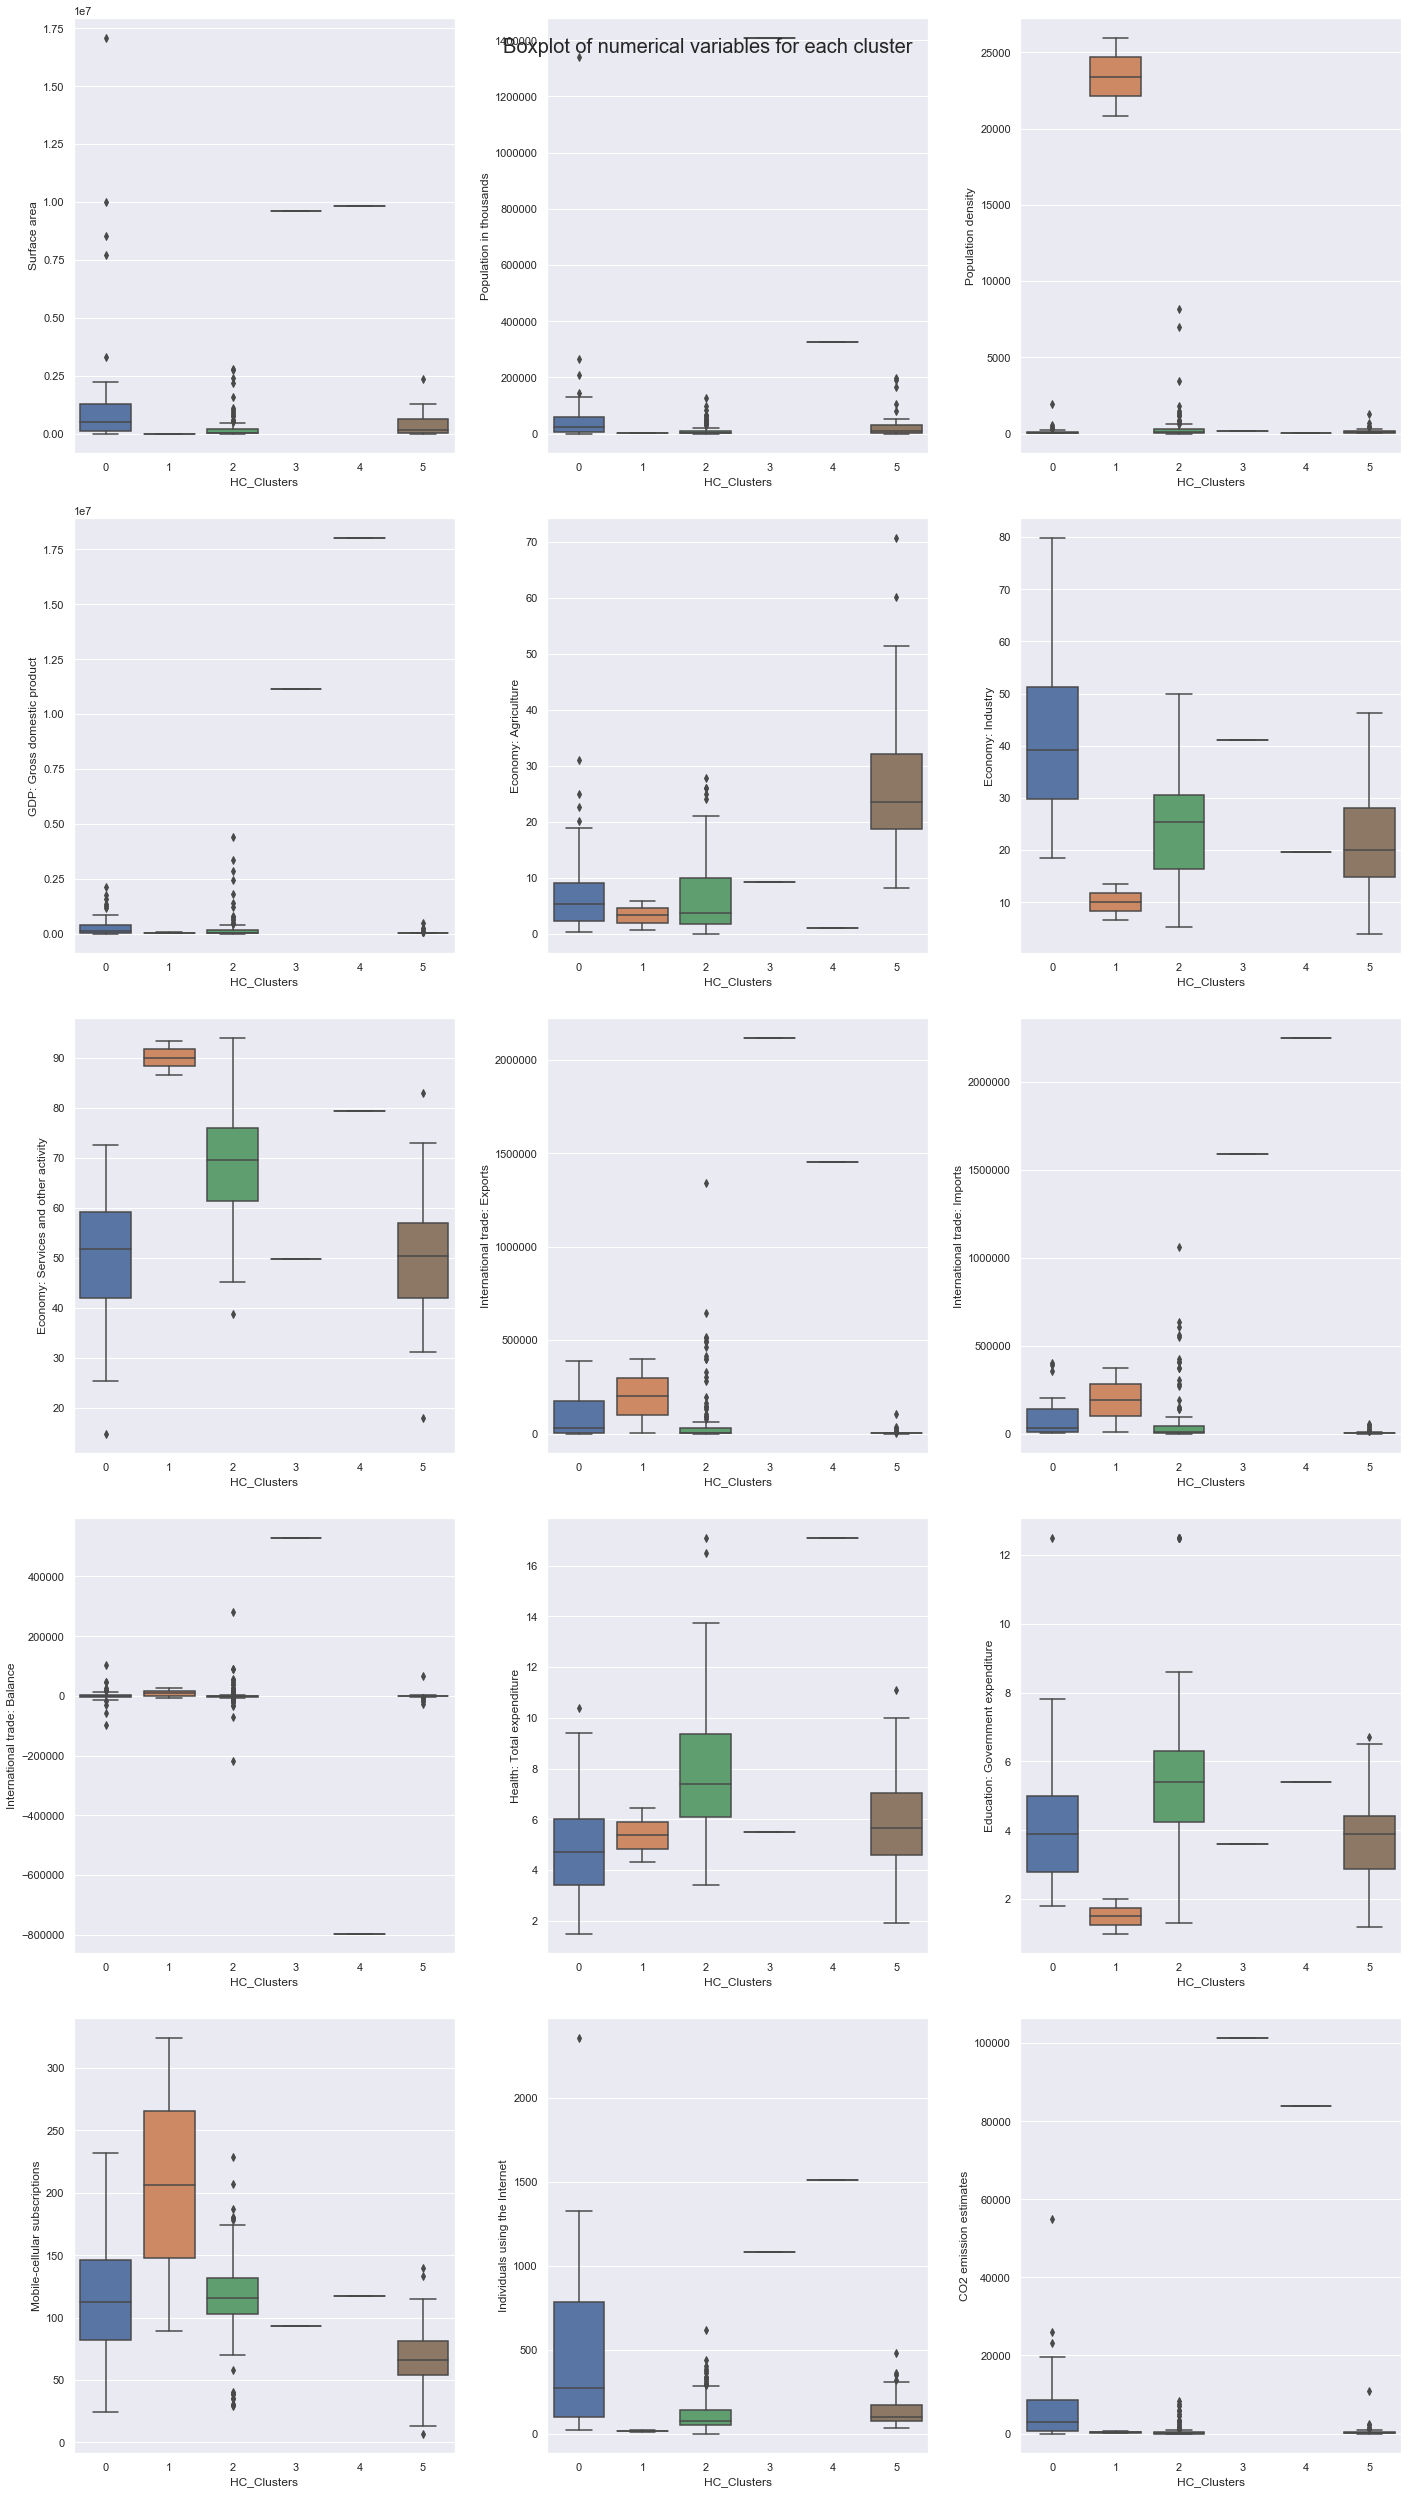

In [36]:
# data
fig, axes = plt.subplots(5, 3,  figsize=(20, 35))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0],y=data[all_col[counter]],x=data['HC_Clusters'])
    counter = counter+1
    sns.boxplot(ax=axes[ii][1],y=data[all_col[counter]],x=data['HC_Clusters'])
    counter = counter+1
    sns.boxplot(ax=axes[ii][2],y=data[all_col[counter]],x=data['HC_Clusters'])
    counter = counter+1
    

fig.tight_layout(pad=2.0)

#### We will look into cluster 0, 2 and 5 only because other clusters have only 1 or 2 countries in them

**Insights**
- **Cluster 0**
   - Number of individual using internet is very high 
   - Mobile subscriber is also medium or high
   - Expenditure on Health is medium so citizen will be healthy enough to venture for tourism and also there will be ease in finding health care facility
   - Expenditure on education is high indicating that citizens would be educated/literate and will be more informed about tourist places  
   - GDP is good (per capita income will be high) and economy is healthy
   - There are 41 countries in this cluster
   
   
- **Cluster 2**
   - Number of individual using internet is medium
   - Mobile subscriber is also medium or high/medium
   - Expenditure on Health is very high so citizen will be will be healthy enough to venture for tourism and also there will be ease in finding health care facility
   - Expenditure on education is high indicating that citizens would be educated/literate and will be more informed about tourist places  
   - GDP is low and economy is self reliant 
   - There are 132 countries in this cluster
   
   
- **Cluster 5**
   - Number of individual using internet is very low 
   - Mobile subscriber is also low 
   - Expenditure on Health is medium
   - Expenditure on education is medium
   - GDP is good and economy is more focused towards agriculture
   - There are 52 countries in this cluster
  


# Recommendation

### Cluster 0 countries are good place to provide tourism services based on cluster profiling done above

## Using PCA to reduce the number of variables

**Let us use the PCA to reduce the dimensions so that it explains 80% variance**

In [37]:
subset_scaled_df2 = subset_scaled_df.drop('HC_Clusters',axis=1).copy()

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(subset_scaled_df2)

PCA()

In [39]:
# Show variance explained by individual components
pca.explained_variance_ratio_

array([3.17296937e-01, 1.61824283e-01, 1.17528999e-01, 8.23326378e-02,
       7.71736972e-02, 5.43519306e-02, 4.51491531e-02, 4.36007516e-02,
       3.48443045e-02, 3.27515953e-02, 2.30155929e-02, 7.42518288e-03,
       2.22282492e-03, 4.82068529e-04, 4.22601870e-08])

Text(0, 0.5, 'Cumulative Explained Variance')

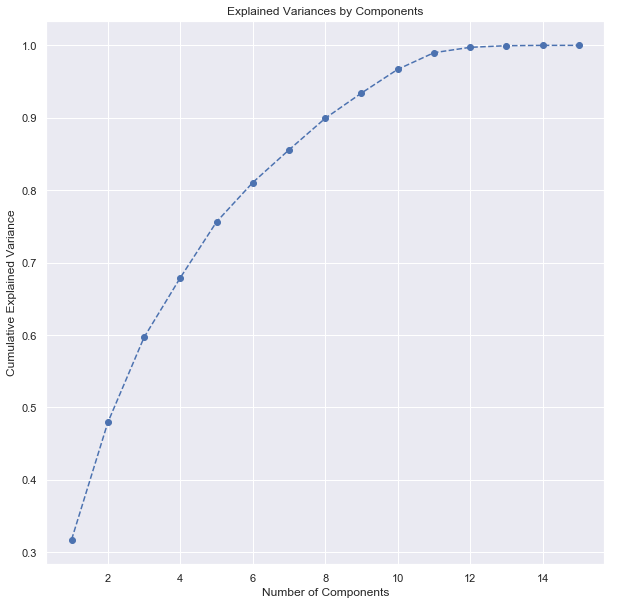

In [40]:
# visulaize the Explained Individual Components
plt.figure(figsize = (10,10))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

for 90% variance , the number of components should be 8

In [41]:
pca = PCA(.9,svd_solver ='full') # svd_solver -full helps to converge faster in case of very large data set
pca.fit(subset_scaled_df2)

PCA(n_components=0.9, svd_solver='full')

In [42]:
pca.explained_variance_

array([4.78032885, 2.43801058, 1.77066715, 1.24040619, 1.16268267,
       0.81885474, 0.68020764, 0.65687974, 0.52495696])

Text(0, 0.5, 'Cumulative Explained Variance')

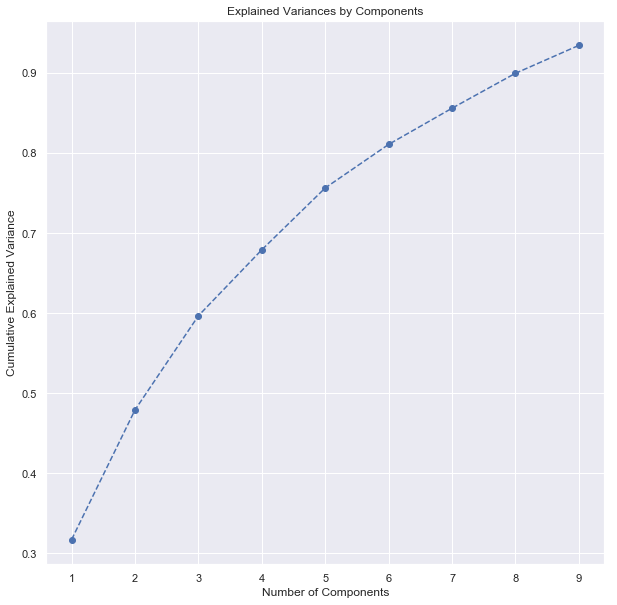

In [43]:
plt.figure(figsize = (10,10))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [44]:
subset_pca = pca.transform(subset_scaled_df2)
subset_pca = pd.DataFrame(subset_pca)

## Perform CLustering

In [45]:
# pd.DataFrame(subset_pca)

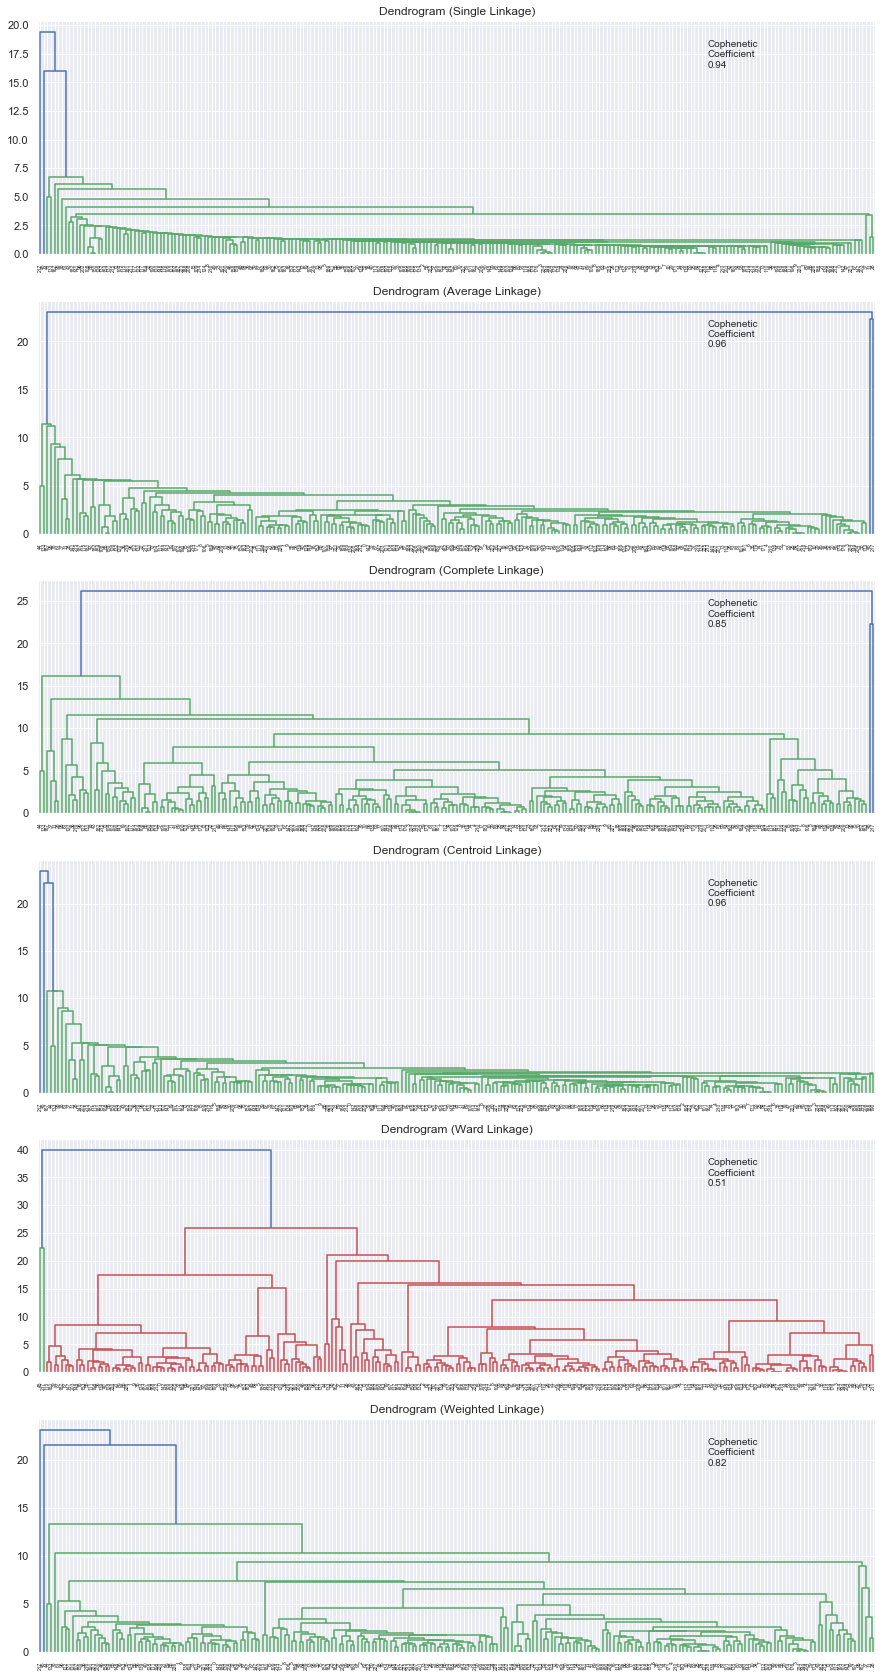

In [46]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_pca, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df2))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

# It can be seen that ward linkage method show 6 as apt number of clusters

In [47]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
hc_labels = hc.fit_predict(subset_pca)

In [48]:
dff = data.drop(['Region','HC_Clusters'] ,axis=1)

In [49]:
dff['PCA_HC_clusters'] = hc_labels

In [50]:
cluster_profile2 = dff.groupby('PCA_HC_clusters').mean()
cluster_profile2['count_in_each_segments'] = dff.groupby('PCA_HC_clusters')['Surface area'].count().values

In [51]:
# lets see names of countries in each cluster
for cl in dff['PCA_HC_clusters'].unique():
    print('In cluster ', cl ,' clutries are: ')
    print(df[dff['PCA_HC_clusters']==cl]['country'].unique())

In cluster  0  clutries are: 
['Afghanistan' 'Albania' 'Angola' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Benin' 'Brunei Darussalam' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'Colombia' 'Comoros' 'Congo'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Ecuador' 'Equatorial Guinea'
 'Eritrea' 'Ethiopia' 'Gabon' 'Guinea-Bissau' 'Guinea' 'Guyana' 'Haiti'
 'Indonesia' 'Iraq' 'Kenya' "Lao People's Democratic Republic" 'Liberia'
 'Libya' 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Mauritania' 'Mayotte'
 'Mexico' 'Mozambique' 'Myanmar' 'Nauru' 'Nepal' 'Nicaragua' 'Niger'
 'Nigeria' 'Oman' 'Pakistan' 'Papua New Guinea' 'Paraguay' 'Peru'
 'Philippines' 'Qatar' 'Rwanda' 'Saint Helena' 'Sierra Leone'
 'Solomon Islands' 'Somalia' 'South Sudan' 'Sri Lanka' 'Sudan'
 'Syrian Arab Republic' 'Tajikistan' 'Thailand' 'Timor-Leste' 'Togo'
 'Tonga' 'Turkmenistan' 'Uganda' 'United Republic of Tanzania'
 'Uzbekistan' 'Vanuatu' 'Viet Nam' 'Yemen']


In [52]:
# lets display cluster profile
cluster_profile2.style.highlight_max(color = 'lightgreen', axis = 0)

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates,count_in_each_segments
PCA_HC_clusters,,,,,,,,,,,,,,,,
0,468670,31936.2,132.771,83869.9,21.3362,32.1803,46.3309,22542.2,23400.4,-855.414,5.29408,4.02039,83.0414,294.118,1442.2,76
1,16,331,23395.7,26218,3.225,10,90,199645,190818,8826.5,5.375,1.5,206.6,16,269,2
2,232472,11013.8,336.305,222241,6.02882,24.1635,69.183,66122.6,65100.2,1083.47,7.66181,5.3441,116.189,120.222,1047.69,144
3,9.6e+06,1.40952e+06,150.1,1.11585e+07,9.2,41.1,49.7,2.11898e+06,1.5887e+06,530285,5.5,3.6,93.2,1080,101394,1
4,9.83352e+06,324460,35.5,1.80366e+07,1,19.7,79.3,1.45317e+06,2.24966e+06,-796494,17.1,5.4,117.6,1513,83887,1
5,9.3156e+06,350707,98.28,1.5997e+06,6.24,27.86,65.88,261919,253775,8144,7.98,4.84,116.02,669.4,24687.6,5


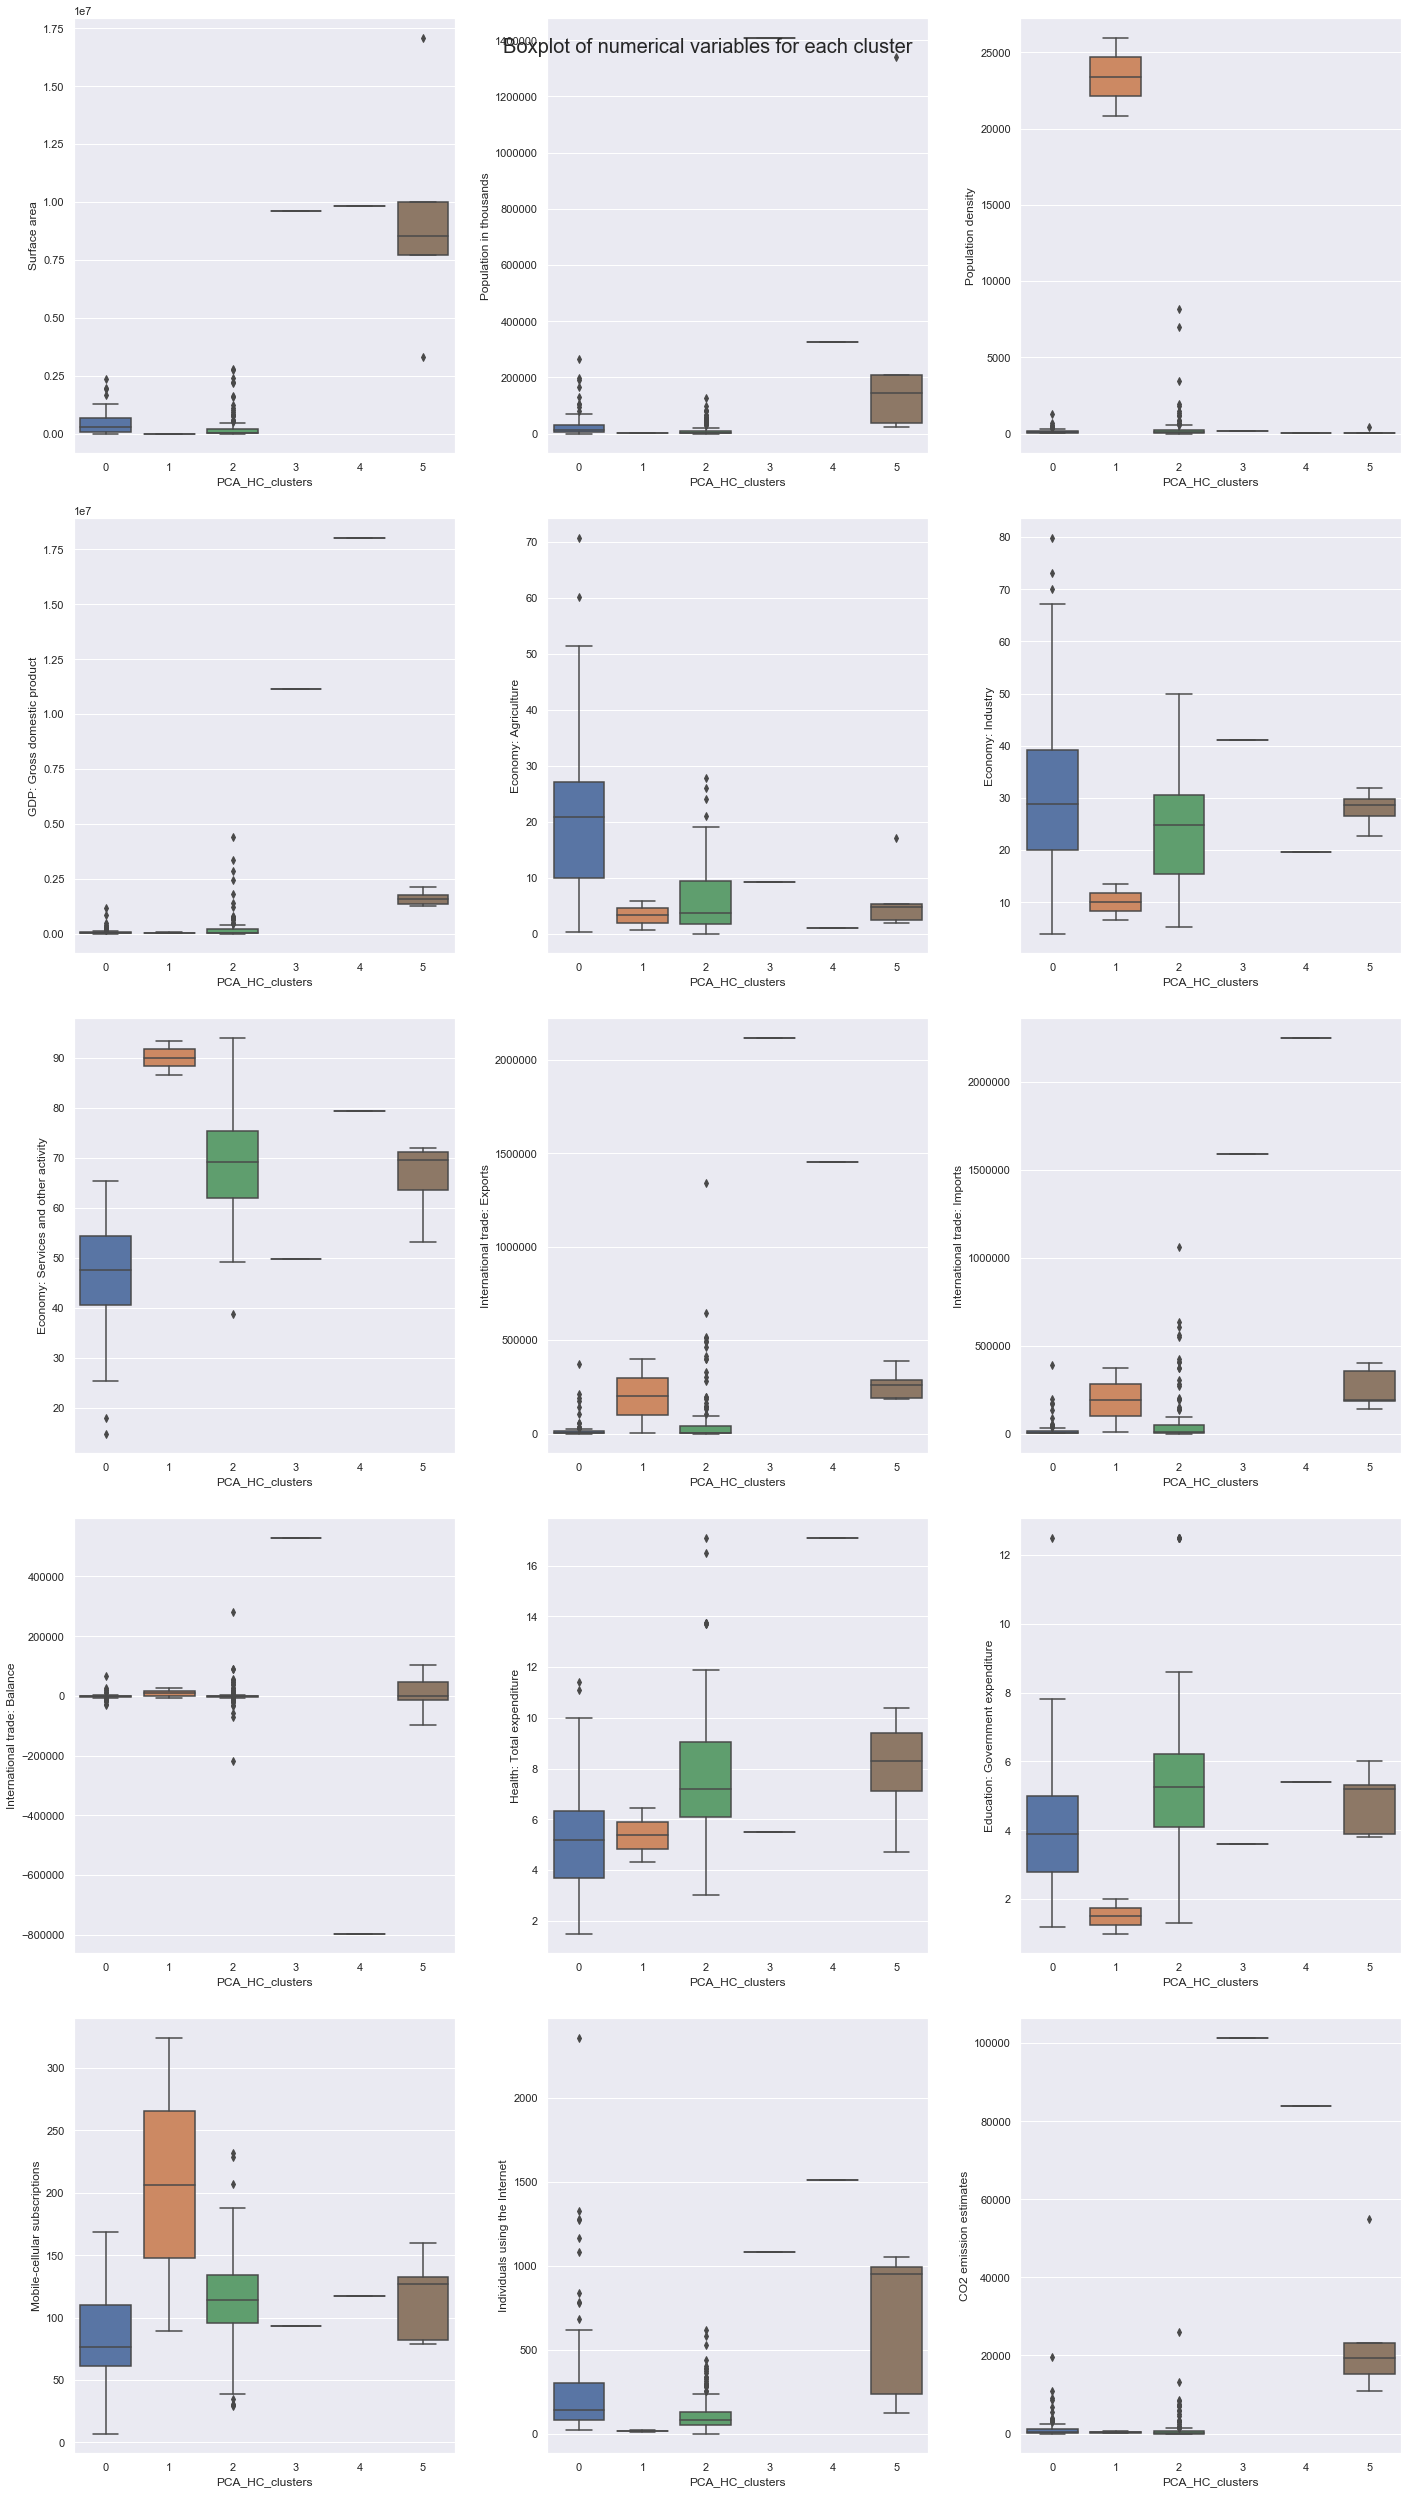

In [53]:
fig, axes = plt.subplots(5, 3,  figsize=(20, 35))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0],y=dff[all_col[counter]],x=dff['PCA_HC_clusters'])
    counter = counter+1
    sns.boxplot(ax=axes[ii][1],y=dff[all_col[counter]],x=dff['PCA_HC_clusters'])
    counter = counter+1
    sns.boxplot(ax=axes[ii][2],y=dff[all_col[counter]],x=dff['PCA_HC_clusters'])
    counter = counter+1
    

fig.tight_layout(pad=2.0)

#### We will look into cluster 0, 2 and 5 only because other clusters have only 1 or 2 countries in them

**Insights**
- **Cluster 0 **
   - There are  76 countries
   - Number of individual using internet is medium 
   - Mobile subscriber is also medium
   - Expenditure on Health is medium so citizen will healthy enough to go out for tourism
   - Expenditure o education is medium
   - GDP is high (indicating high per capita income) and economy is also good
   - Economy is also good

- **Cluster 2**
   - There are 144 countries
   - Number of individual using internet is low 
   - Mobile subscriber is also medium
   - Expenditure on Health is high 
   - Expenditure o education is high 
   - GDP is low and economy is self reliant with focus on services

   
   
- **Cluster 5**
   - There are 5 countries
   - Number of individual using internet is very high 
   - Mobile subscriber is also high 
   - Expenditure on Health is high so citizen will healthy enough to go out for tourism
   - Expenditure on education is medium indicating that citizens would be educated so they can go out for tourism and move from one places to another
   - GDP is very high (indicating high per capita income) and economy is also good
   - Economy is also good
   

# Business Recommendations
- Countries from Cluster 0 and cluster 5 can be recommended to provide tourism services with higher priority given to cluster 5
